In [ ]:
import os
import pandas as pd

# Set the directory where your CSV files are stored
directory = "/content/"

# Create an empty list to hold the DataFrames
dataframes = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Only process CSV files
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)

        # Extract the company name from the filename (assuming it's the file name without extension)
        company_name = os.path.splitext(filename)[0]

        # Add the company name as a new column
        df['CompanyName'] = company_name

        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_dataset_with_company.csv", index=False)

# Print the first few rows of the combined DataFrame to verify
print(combined_df.head())


         date     open     high      low    close    volume  unadjustedVolume  \
0  2014-02-21  79.1586  79.2415  78.7109  78.7855  11286050          11286050   
1  2014-02-24  79.2664  80.6261  79.1006  79.9545  16034244          16034244   
2  2014-02-25  80.0374  80.3939  79.5566  79.8467  10664330          10664330   
3  2014-02-26  80.0540  80.3027  79.2001  79.4156   9088471           9088471   
4  2014-02-27  79.2415  79.6312  78.8933  79.4571   9101165           9101165   

     change  changePercent     vwap       label  changeOverTime CompanyName  
0 -0.281881         -0.357  79.0049  Feb 21, 14        0.000000         XOM  
1  1.169000          1.484  80.1838  Feb 24, 14        0.014838         XOM  
2 -0.107777         -0.135  80.0049  Feb 25, 14        0.013469         XOM  
3 -0.431109         -0.540  79.6364  Feb 26, 14        0.007998         XOM  
4  0.041451          0.052  79.3347  Feb 27, 14        0.008524         XOM  


In [ ]:
# Display the shape and initial analysis of the combined dataset.
combined_shape = combined_df.shape
combined_info = combined_df.info()
combined_description = combined_df.describe()

combined_shape, combined_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110550 entries, 0 to 110549
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              110550 non-null  object 
 1   open              110550 non-null  float64
 2   high              110550 non-null  float64
 3   low               110550 non-null  float64
 4   close             110550 non-null  float64
 5   volume            110550 non-null  int64  
 6   unadjustedVolume  110550 non-null  int64  
 7   change            110550 non-null  float64
 8   changePercent     110550 non-null  float64
 9   vwap              110550 non-null  float64
 10  label             110550 non-null  object 
 11  changeOverTime    110550 non-null  float64
 12  CompanyName       110550 non-null  object 
dtypes: float64(8), int64(2), object(3)
memory usage: 11.0+ MB


((110550, 13),
                 open           high            low          close  \
 count  110550.000000  110550.000000  110550.000000  110550.000000   
 mean       94.517210      95.253794      93.762140      94.528138   
 std        52.679528      53.139366      52.190651      52.675419   
 min        18.169400      18.407800      18.109800      18.177900   
 25%        56.826300      57.396300      56.186600      56.767900   
 50%        84.085800      84.669900      83.540400      84.086050   
 75%       118.301300     119.146000     117.389200     118.318600   
 max       417.140000     421.840000     417.110000     421.550000   
 
              volume  unadjustedVolume         change  changePercent  \
 count  1.105500e+05      1.105500e+05  110550.000000  110550.000000   
 mean   1.119657e+07      1.096724e+07       0.048326       0.054615   
 std    1.246160e+07      1.215204e+07       1.504226       1.295357   
 min    3.053580e+05      3.053580e+05     -23.453300     -14.337

## Data Cleaning and Pre-Processing

<ipython-input-3-80c5752c2bad>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
<ipython-input-3-80c5752c2bad>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df_ffill.fillna(method='bfill')
<ipython-input-3-80c5752c2bad>:12: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_bfill.interpolate(method='linear')


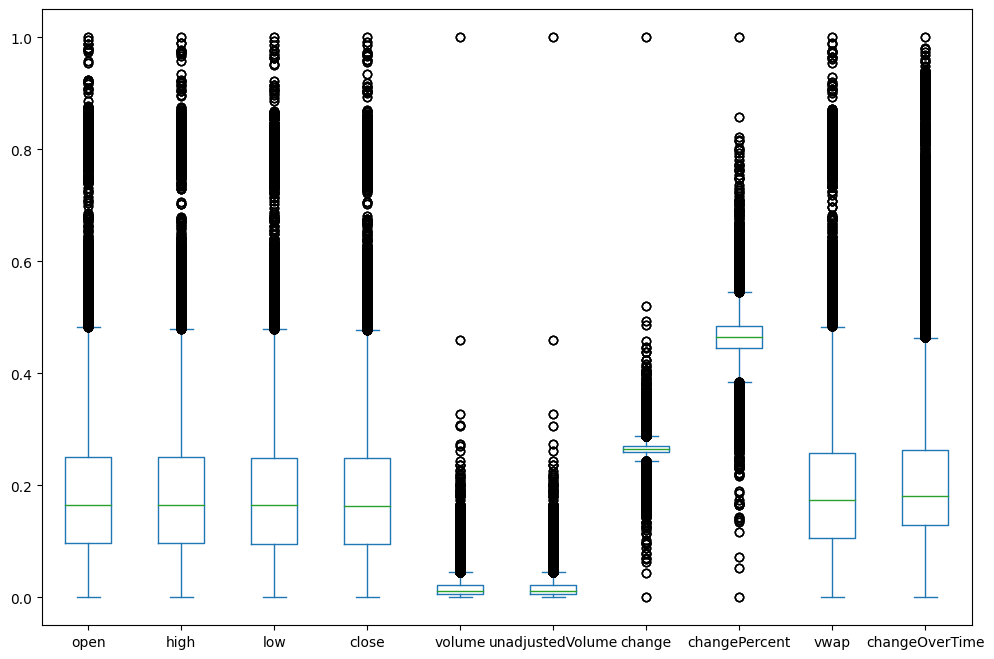

((110550, 13),
          date      open      high       low     close    volume  \
 0  2014-02-21  0.152866  0.150790  0.151882  0.150252  0.017770   
 1  2014-02-24  0.153137  0.154222  0.152859  0.153150  0.025454   
 2  2014-02-25  0.155069  0.153647  0.154002  0.152883  0.016764   
 3  2014-02-26  0.155111  0.153421  0.153108  0.151814  0.014214   
 4  2014-02-27  0.153074  0.151756  0.152340  0.151917  0.014234   
 
    unadjustedVolume    change  changePercent      vwap       label  \
 0          0.017770  0.261101       0.450910  0.160416  Feb 21, 14   
 1          0.025454  0.277450       0.510289  0.163316  Feb 24, 14   
 2          0.016764  0.263063       0.458070  0.162876  Feb 25, 14   
 3          0.014214  0.259419       0.445007  0.161969  Feb 26, 14   
 4          0.014234  0.264744       0.464101  0.161227  Feb 27, 14   
 
    changeOverTime CompanyName  
 0        0.113423         XOM  
 1        0.117541         XOM  
 2        0.117161         XOM  
 3        0.115

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Handle missing data: Forward fill, backward fill, and interpolation
def handle_missing_data(df):
    # Forward fill
    df_ffill = df.fillna(method='ffill')
    # Backward fill
    df_bfill = df_ffill.fillna(method='bfill')
    # Interpolation
    df_interpolated = df_bfill.interpolate(method='linear')
    return df_interpolated

# Normalization: Min-Max scaling and Z-score normalization
def normalize_data(df, method='minmax'):
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Only numeric columns
    df_normalized = df.copy()

    if method == 'minmax':
        scaler = MinMaxScaler()
        df_normalized[numeric_cols] = scaler.fit_transform(df_normalized[numeric_cols])
    elif method == 'zscore':
        scaler = StandardScaler()
        df_normalized[numeric_cols] = scaler.fit_transform(df_normalized[numeric_cols])

    return df_normalized

# Outlier detection using Z-scores
def detect_outliers_zscore(df, threshold=3):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
    return (z_scores > threshold).any(axis=1)  # Returns a boolean mask of outliers

# Outlier detection using Boxplots
def plot_boxplots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols].plot(kind='box', figsize=(12, 8))
    plt.show()

# Process the combined_df
# Step 1: Handle missing data
combined_df_cleaned = handle_missing_data(combined_df)

# Step 2: Normalize the data (using Min-Max scaling here, you can change to 'zscore' if required)
combined_df_normalized = normalize_data(combined_df_cleaned, method='minmax')

# Step 3: Detect outliers using Z-scores
outliers = detect_outliers_zscore(combined_df_normalized)

# Step 4: Plot Boxplots to visualize outliers
plot_boxplots(combined_df_normalized)

# Display a summary of the cleaned and normalized dataset
combined_df_cleaned.shape, combined_df_normalized.head(), outliers.sum()  # Count of outliers detected

### Feature Engineering

In [ ]:
# Feature Engineering - 5 Most Important Features

# 1. Moving Averages (5-day, 20-day)
combined_df_normalized['MA_5'] = combined_df_cleaned['close'].rolling(window=5).mean()
combined_df_normalized['MA_20'] = combined_df_cleaned['close'].rolling(window=20).mean()

# 2. RSI (Relative Strength Index)
def compute_rsi(df, window=14):
    delta = df['close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

combined_df_normalized['RSI_14'] = compute_rsi(combined_df_cleaned)

# 3. Daily Returns
combined_df_normalized['Daily_Return'] = combined_df_cleaned['close'].pct_change()

# 4. Rolling Standard Deviation (Volatility)
combined_df_normalized['Rolling_Std_20'] = combined_df_cleaned['close'].rolling(window=20).std()

# 5. Lag Features (Lagged close prices)
combined_df_normalized['close_1'] = combined_df_cleaned['close'].shift(1)
combined_df_normalized['close_2'] = combined_df_cleaned['close'].shift(2)

# Display the first few rows of the engineered dataset
combined_df_normalized.head()

date      open      high       low     close    volume  \
0  2014-02-21  0.152866  0.150790  0.151882  0.150252  0.017770   
1  2014-02-24  0.153137  0.154222  0.152859  0.153150  0.025454   
2  2014-02-25  0.155069  0.153647  0.154002  0.152883  0.016764   
3  2014-02-26  0.155111  0.153421  0.153108  0.151814  0.014214   
4  2014-02-27  0.153074  0.151756  0.152340  0.151917  0.014234   

   unadjustedVolume    change  changePercent      vwap       label  \
0          0.017770  0.261101       0.450910  0.160416  Feb 21, 14   
1          0.025454  0.277450       0.510289  0.163316  Feb 24, 14   
2          0.016764  0.263063       0.458070  0.162876  Feb 25, 14   
3          0.014214  0.259419       0.445007  0.161969  Feb 26, 14   
4          0.014234  0.264744       0.464101  0.161227  Feb 27, 14   

   changeOverTime CompanyName      MA_5  MA_20  RSI_14  Daily_Return  \
0        0.113423         XOM       NaN    NaN     NaN           NaN   
1        0.117541         XOM       NaN    NaN     NaN      0.014838   
2        0.117161         XOM       NaN    NaN     NaN     -0.001348   
3        0.115642         XOM       NaN    NaN     NaN     -0.005399   
4        0.115789         XOM  79.49188    NaN     NaN      0.000523   

   Rolling_Std_20  close_1  close_2  
0             NaN      NaN      NaN  
1             NaN  78.7855      NaN  
2             NaN  79.9545  78.7855  
3             NaN  79.8467  79.9545  
4             NaN  79.4156  79.8467

In [ ]:
# Handle NaN values after feature engineering
# Use forward fill to propagate the last valid observation
combined_df_normalized.fillna(method='ffill', inplace=True)

# Alternatively, you can use backward fill if preferred
# combined_df_normalized.fillna(method='bfill', inplace=True)

# If there are still any NaN values remaining (e.g., at the beginning), you can drop them
combined_df_normalized.dropna(inplace=True)

# Display the first few rows to verify that NaN values are handled
combined_df_normalized.head()

<ipython-input-5-18a02c33bc88>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df_normalized.fillna(method='ffill', inplace=True)


date      open      high       low     close    volume  \
19  2014-03-20  0.148627  0.149064  0.147872  0.149328  0.016344   
20  2014-03-21  0.152077  0.151633  0.150573  0.148773  0.039126   
21  2014-03-24  0.151370  0.149804  0.150927  0.149451  0.014944   
22  2014-03-25  0.152077  0.151284  0.151592  0.150006  0.015364   
23  2014-03-26  0.153033  0.150790  0.150781  0.149574  0.017362   

    unadjustedVolume    change  changePercent      vwap       label  \
19          0.016344  0.272218       0.491678  0.158625  Mar 20, 14   
20          0.039126  0.261755       0.453232  0.152562  Mar 21, 14   
21          0.014944  0.267360       0.473713  0.159387  Mar 24, 14   
22          0.015364  0.266799       0.471617  0.160885  Mar 25, 14   
23          0.017362  0.262315       0.455296  0.159176  Mar 26, 14   

    changeOverTime CompanyName      MA_5      MA_20     RSI_14  Daily_Return  \
19        0.112109         XOM  78.06592  78.695165  42.832881      0.009069   
20        0.111320         XOM  78.20520  78.665320  44.729701     -0.002855   
21        0.112284         XOM  78.25826  78.590705  41.132226      0.003499   
22        0.113072         XOM  78.29142  78.532670  56.809436      0.002852   
23        0.112459         XOM  78.45224  78.487485  55.648984     -0.002213   

    Rolling_Std_20  close_1  close_2  
19        0.861729  77.7078  78.5202  
20        0.868744  78.4125  77.7078  
21        0.814588  78.1886  78.4125  
22        0.759907  78.4622  78.1886  
23        0.730960  78.6860  78.4622

In [ ]:
combined_df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110531 entries, 19 to 110549
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              110531 non-null  object 
 1   open              110531 non-null  float64
 2   high              110531 non-null  float64
 3   low               110531 non-null  float64
 4   close             110531 non-null  float64
 5   volume            110531 non-null  float64
 6   unadjustedVolume  110531 non-null  float64
 7   change            110531 non-null  float64
 8   changePercent     110531 non-null  float64
 9   vwap              110531 non-null  float64
 10  label             110531 non-null  object 
 11  changeOverTime    110531 non-null  float64
 12  CompanyName       110531 non-null  object 
 13  MA_5              110531 non-null  float64
 14  MA_20             110531 non-null  float64
 15  RSI_14            110531 non-null  float64
 16  Daily_Return      110531

## Exploratory Data Analysis

### Summary Statistics

In [ ]:
# Summary Statistics, Skewness, and Kurtosis for the numerical columns

# Select numeric columns for analysis
numeric_cols = combined_df_normalized.select_dtypes(include=[np.number])

# Summary statistics
summary_statistics = numeric_cols.describe()

# Skewness and Kurtosis
skewness = numeric_cols.skew()
kurtosis = numeric_cols.kurtosis()

# Combine the summary statistics with skewness and kurtosis
summary_stats_with_skewness_kurtosis = summary_statistics.copy()
summary_stats_with_skewness_kurtosis.loc['skewness'] = skewness
summary_stats_with_skewness_kurtosis.loc['kurtosis'] = kurtosis

# Display the result
summary_stats_with_skewness_kurtosis

open           high            low          close  \
count     110531.000000  110531.000000  110531.000000  110531.000000   
mean           0.191369       0.190487       0.189611       0.189287   
std            0.132049       0.131729       0.130814       0.130598   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.096822       0.096624       0.095414       0.095662   
50%            0.165238       0.164269       0.164079       0.163423   
75%            0.250978       0.249741       0.248848       0.248282   
max            1.000000       1.000000       1.000000       1.000000   
skewness       1.511015       1.520776       1.499431       1.510926   
kurtosis       3.755381       3.812722       3.687878       3.757844   

                 volume  unadjustedVolume         change  changePercent  \
count     110531.000000     110531.000000  110531.000000  110531.000000   
mean           0.017625          0.017254       0.264822       0.464187   
std            0.020168          0.019667       0.016951       0.041782   
min            0.000000          0.000000       0.000000       0.000000   
25%            0.005941          0.005683       0.259413       0.444459   
50%            0.010905          0.010663       0.264694       0.464134   
75%            0.021803          0.021486       0.270575       0.484970   
max            1.000000          1.000000       1.000000       1.000000   
skewness       6.414137          6.563091       2.016775       0.017067   
kurtosis     176.407474        192.243222     116.532442       7.702037   

                   vwap  changeOverTime           MA_5          MA_20  \
count     110531.000000   110531.000000  110531.000000  110531.000000   
mean           0.198597        0.220109      94.529784      94.526180   
std            0.129586        0.137847      52.593163      52.334992   
min            0.000000        0.000000      18.329480      18.480200   
25%            0.105724        0.129450      56.917970      57.096350   
50%            0.173010        0.180567      84.137100      84.079335   
75%            0.256935        0.263254     118.244920     118.425128   
max            1.000000        1.000000     415.236000     393.400705   
skewness       1.510597        1.948458       1.504596       1.486860   
kurtosis       3.753474        4.652241       3.711187       3.582622   

                 RSI_14   Daily_Return  Rolling_Std_20        close_1  \
count     110531.000000  110531.000000   110531.000000  110531.000000   
mean          53.611046       0.000348        2.349048      94.530291   
std           17.261873       0.020278        5.697235      52.679381   
min            0.126462      -0.955303        0.091578      18.177900   
25%           41.775745      -0.005587        0.855177      56.765350   
50%           53.681179       0.000527        1.448291      84.092400   
75%           65.872287       0.006993        2.457456     118.327000   
max           99.111069       0.949573      201.321361     421.550000   
skewness      -0.091639     -12.102553       18.387038       1.510965   
kurtosis      -0.297429     804.438127      481.468486       3.757984   

                close_2  
count     110531.000000  
mean          94.529773  
std           52.679257  
min           18.177900  
25%           56.765350  
50%           84.092400  
75%          118.327000  
max          421.550000  
skewness       1.511001  
kurtosis       3.758104

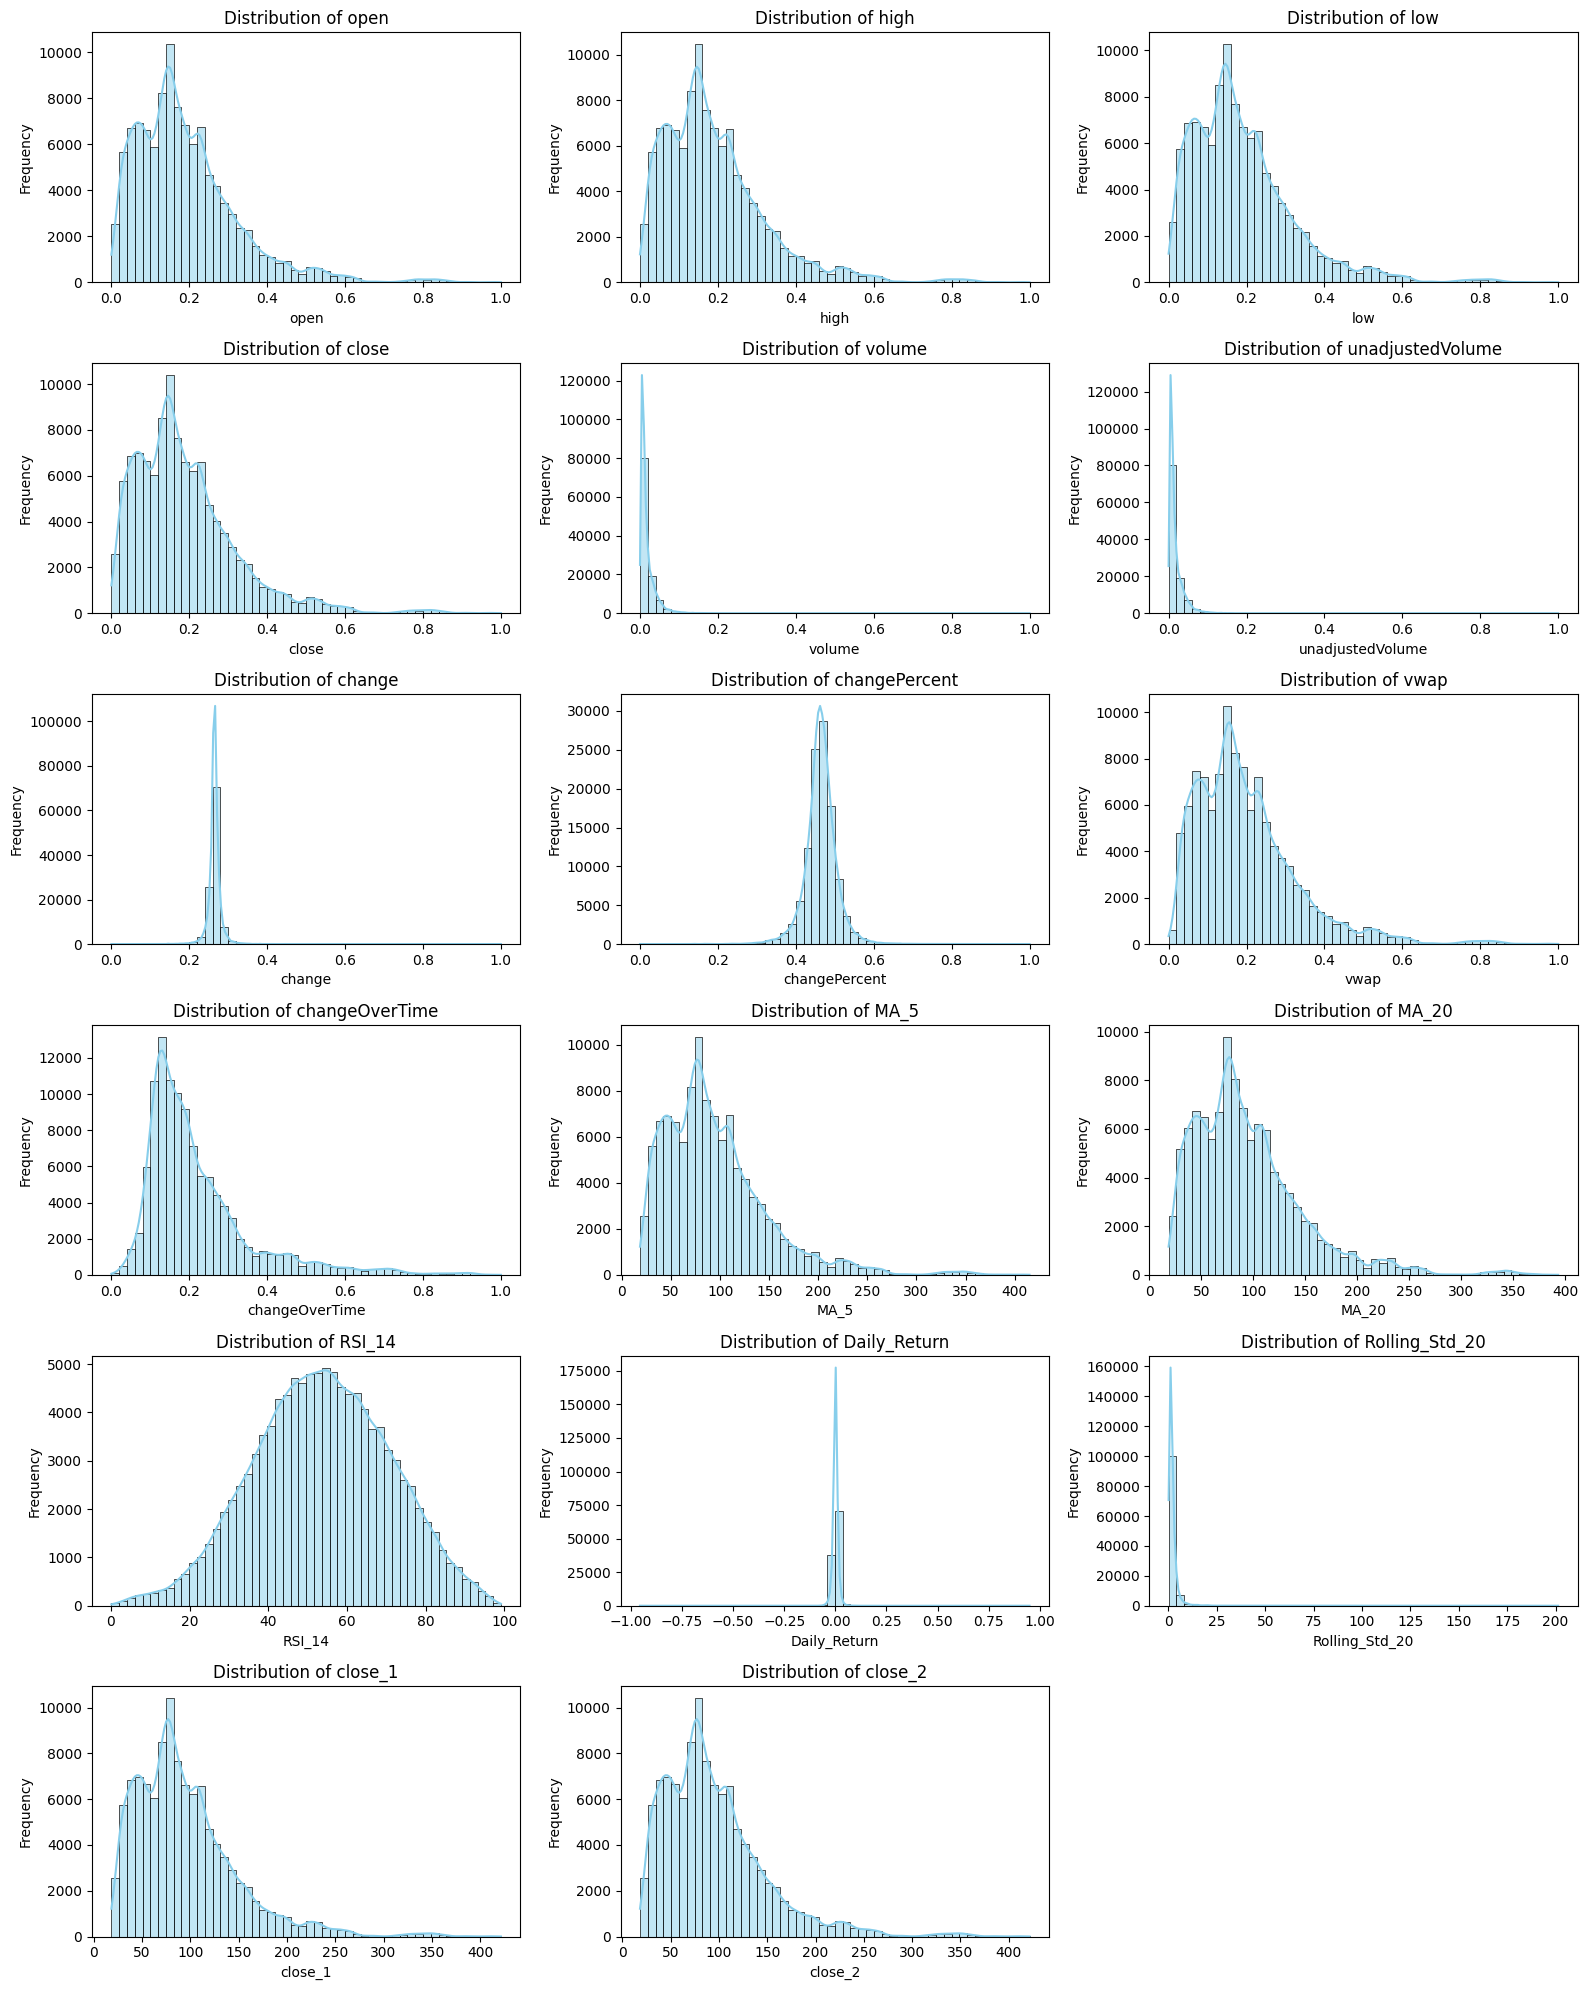

In [ ]:
# Create more complex histograms with density plots for each numeric column

import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(16, 20))

# Loop through each numerical column and plot the histogram with density plot
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(numeric_cols[col], kde=True, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Boxplot

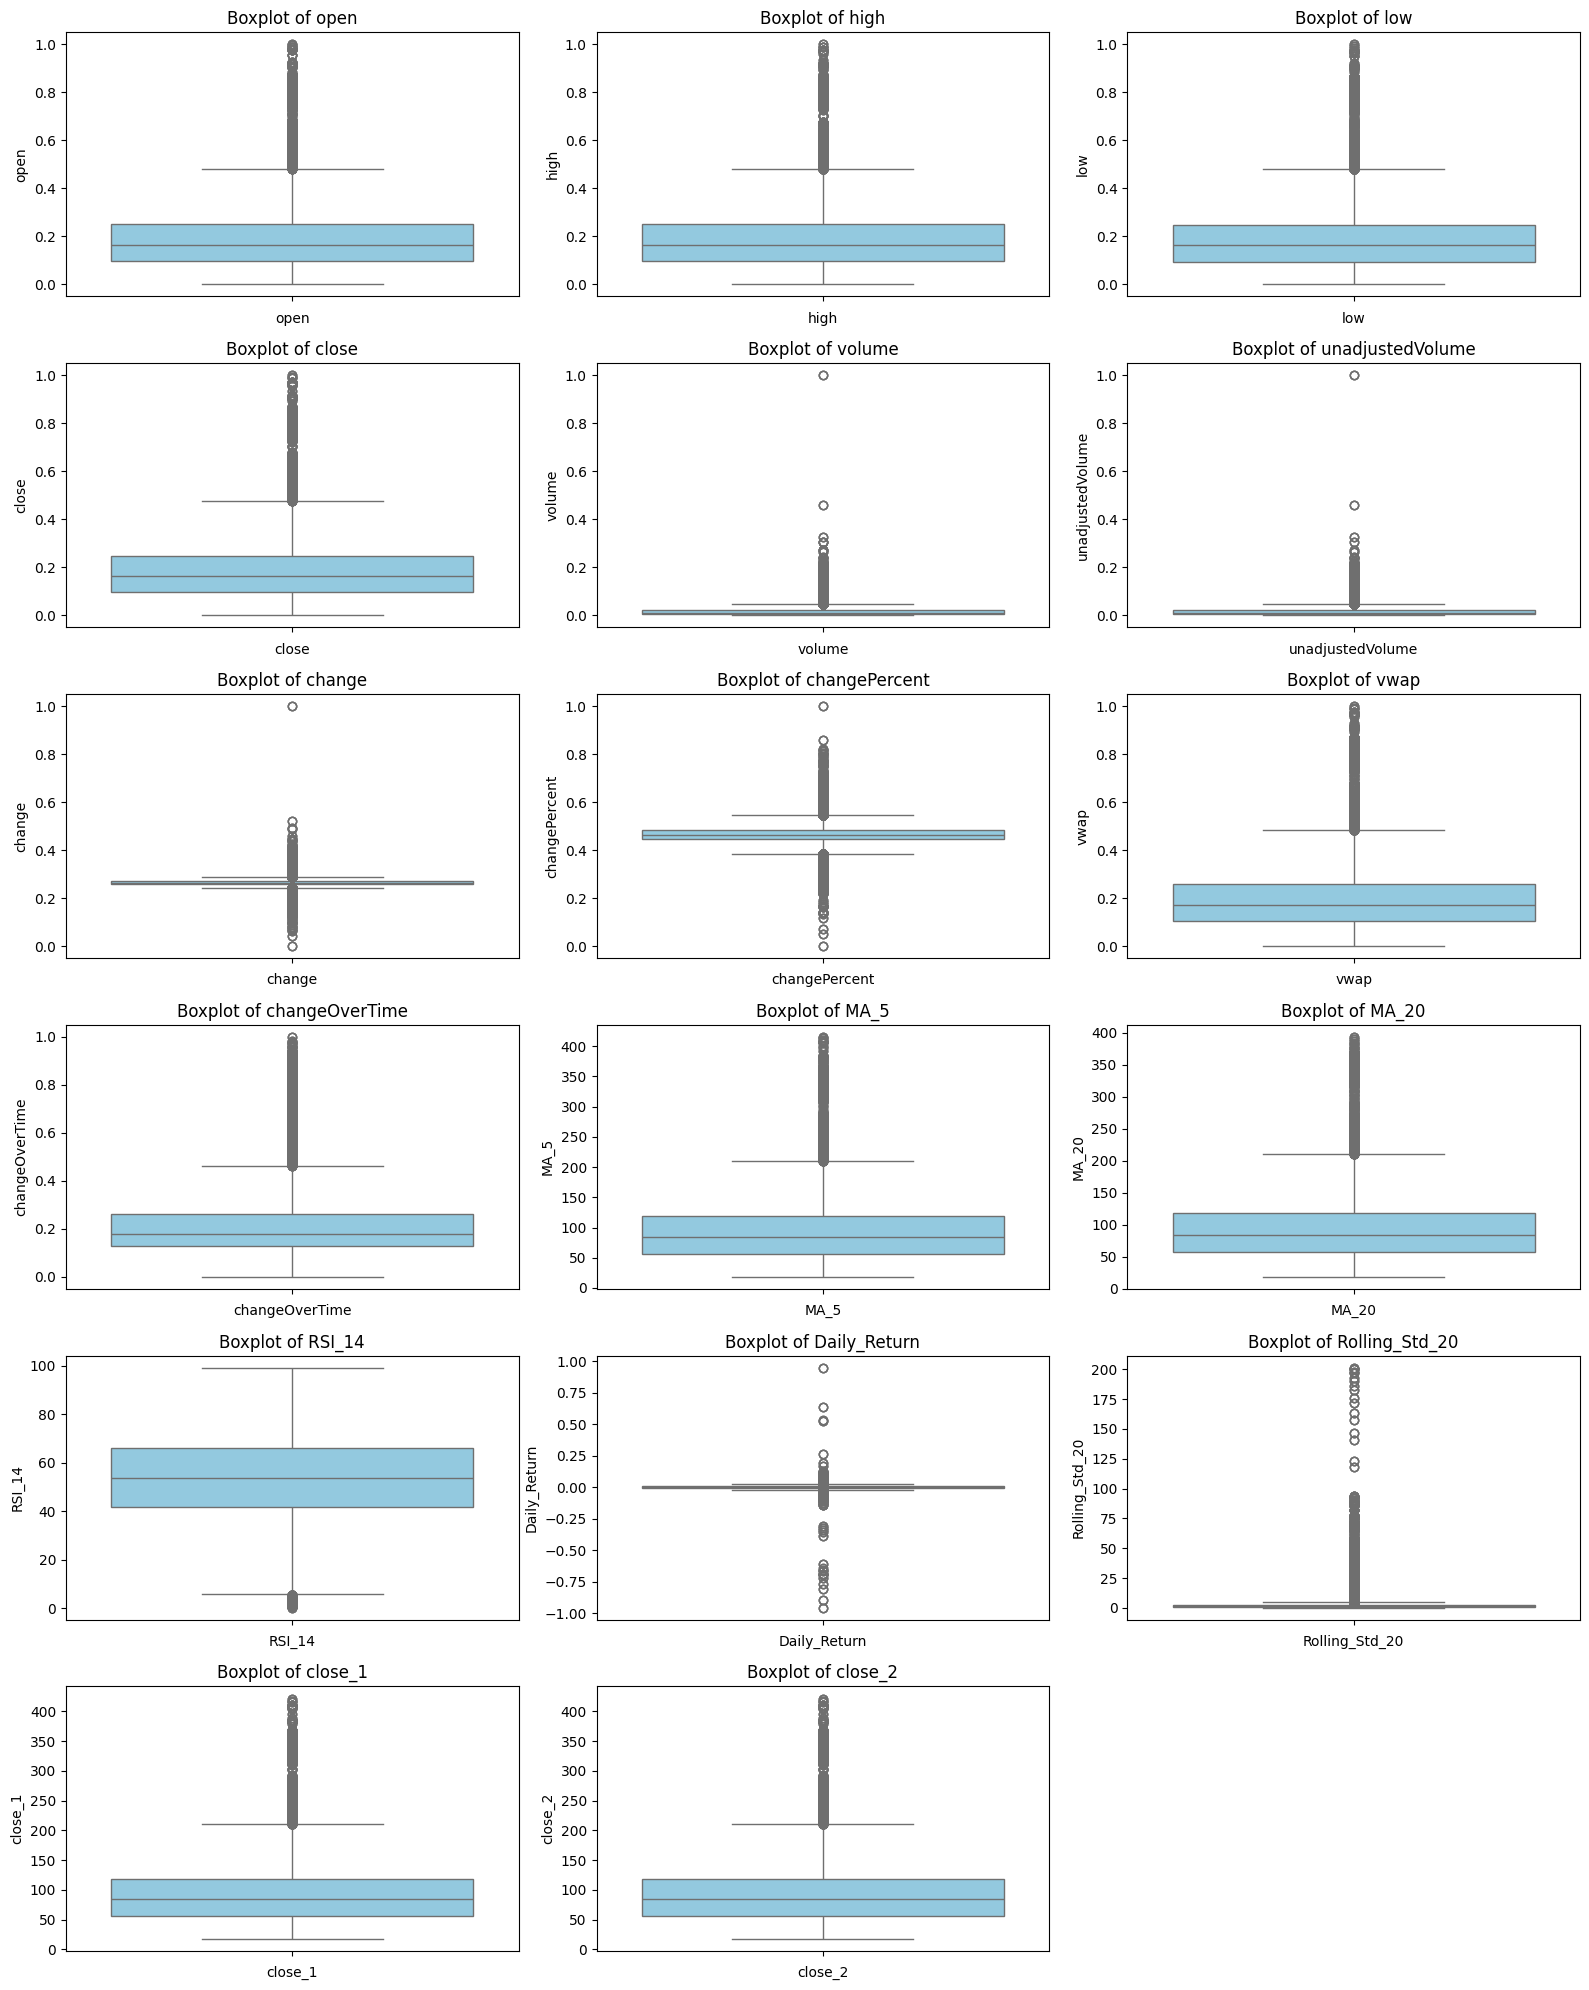

In [ ]:
# Create boxplots for each numeric column

# Set up the matplotlib figure
plt.figure(figsize=(16, 20))

# Loop through each numerical column and plot the boxplot
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=numeric_cols[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## Coorelation Heatmap

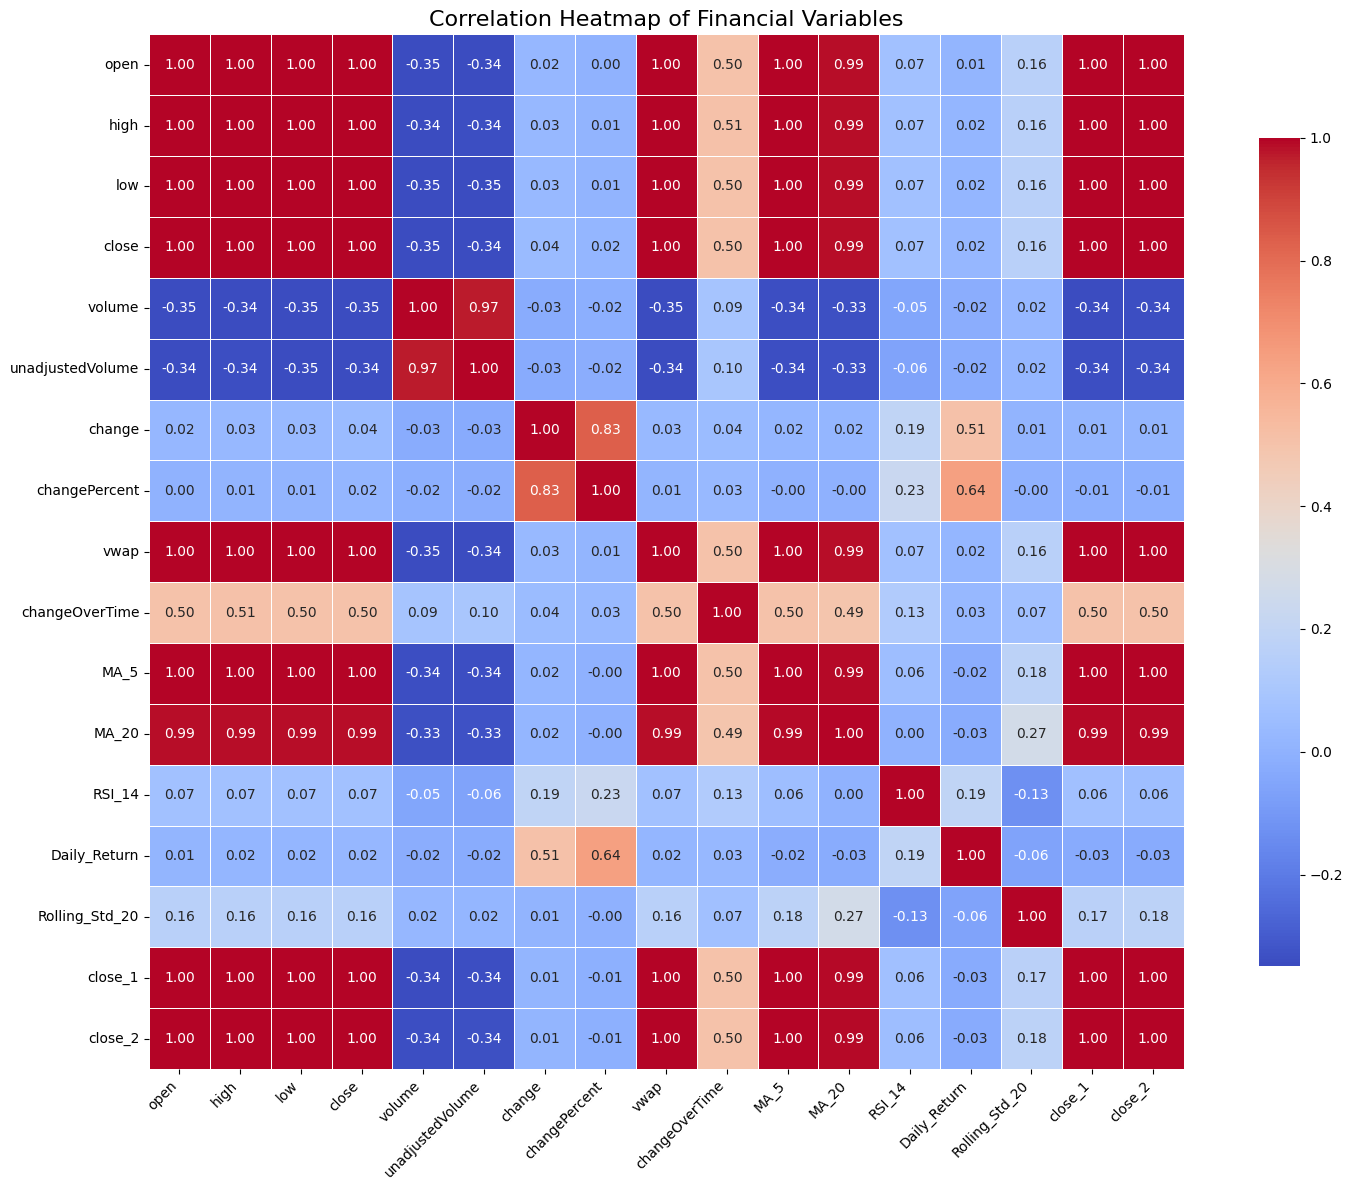

In [ ]:
# Create a complex correlation heatmap with annotations and a color bar

plt.figure(figsize=(16, 12))

# Generate the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a heatmap with more complex styling
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={"shrink": 0.8}, square=True)

# Add titles and labels
plt.title('Correlation Heatmap of Financial Variables', fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

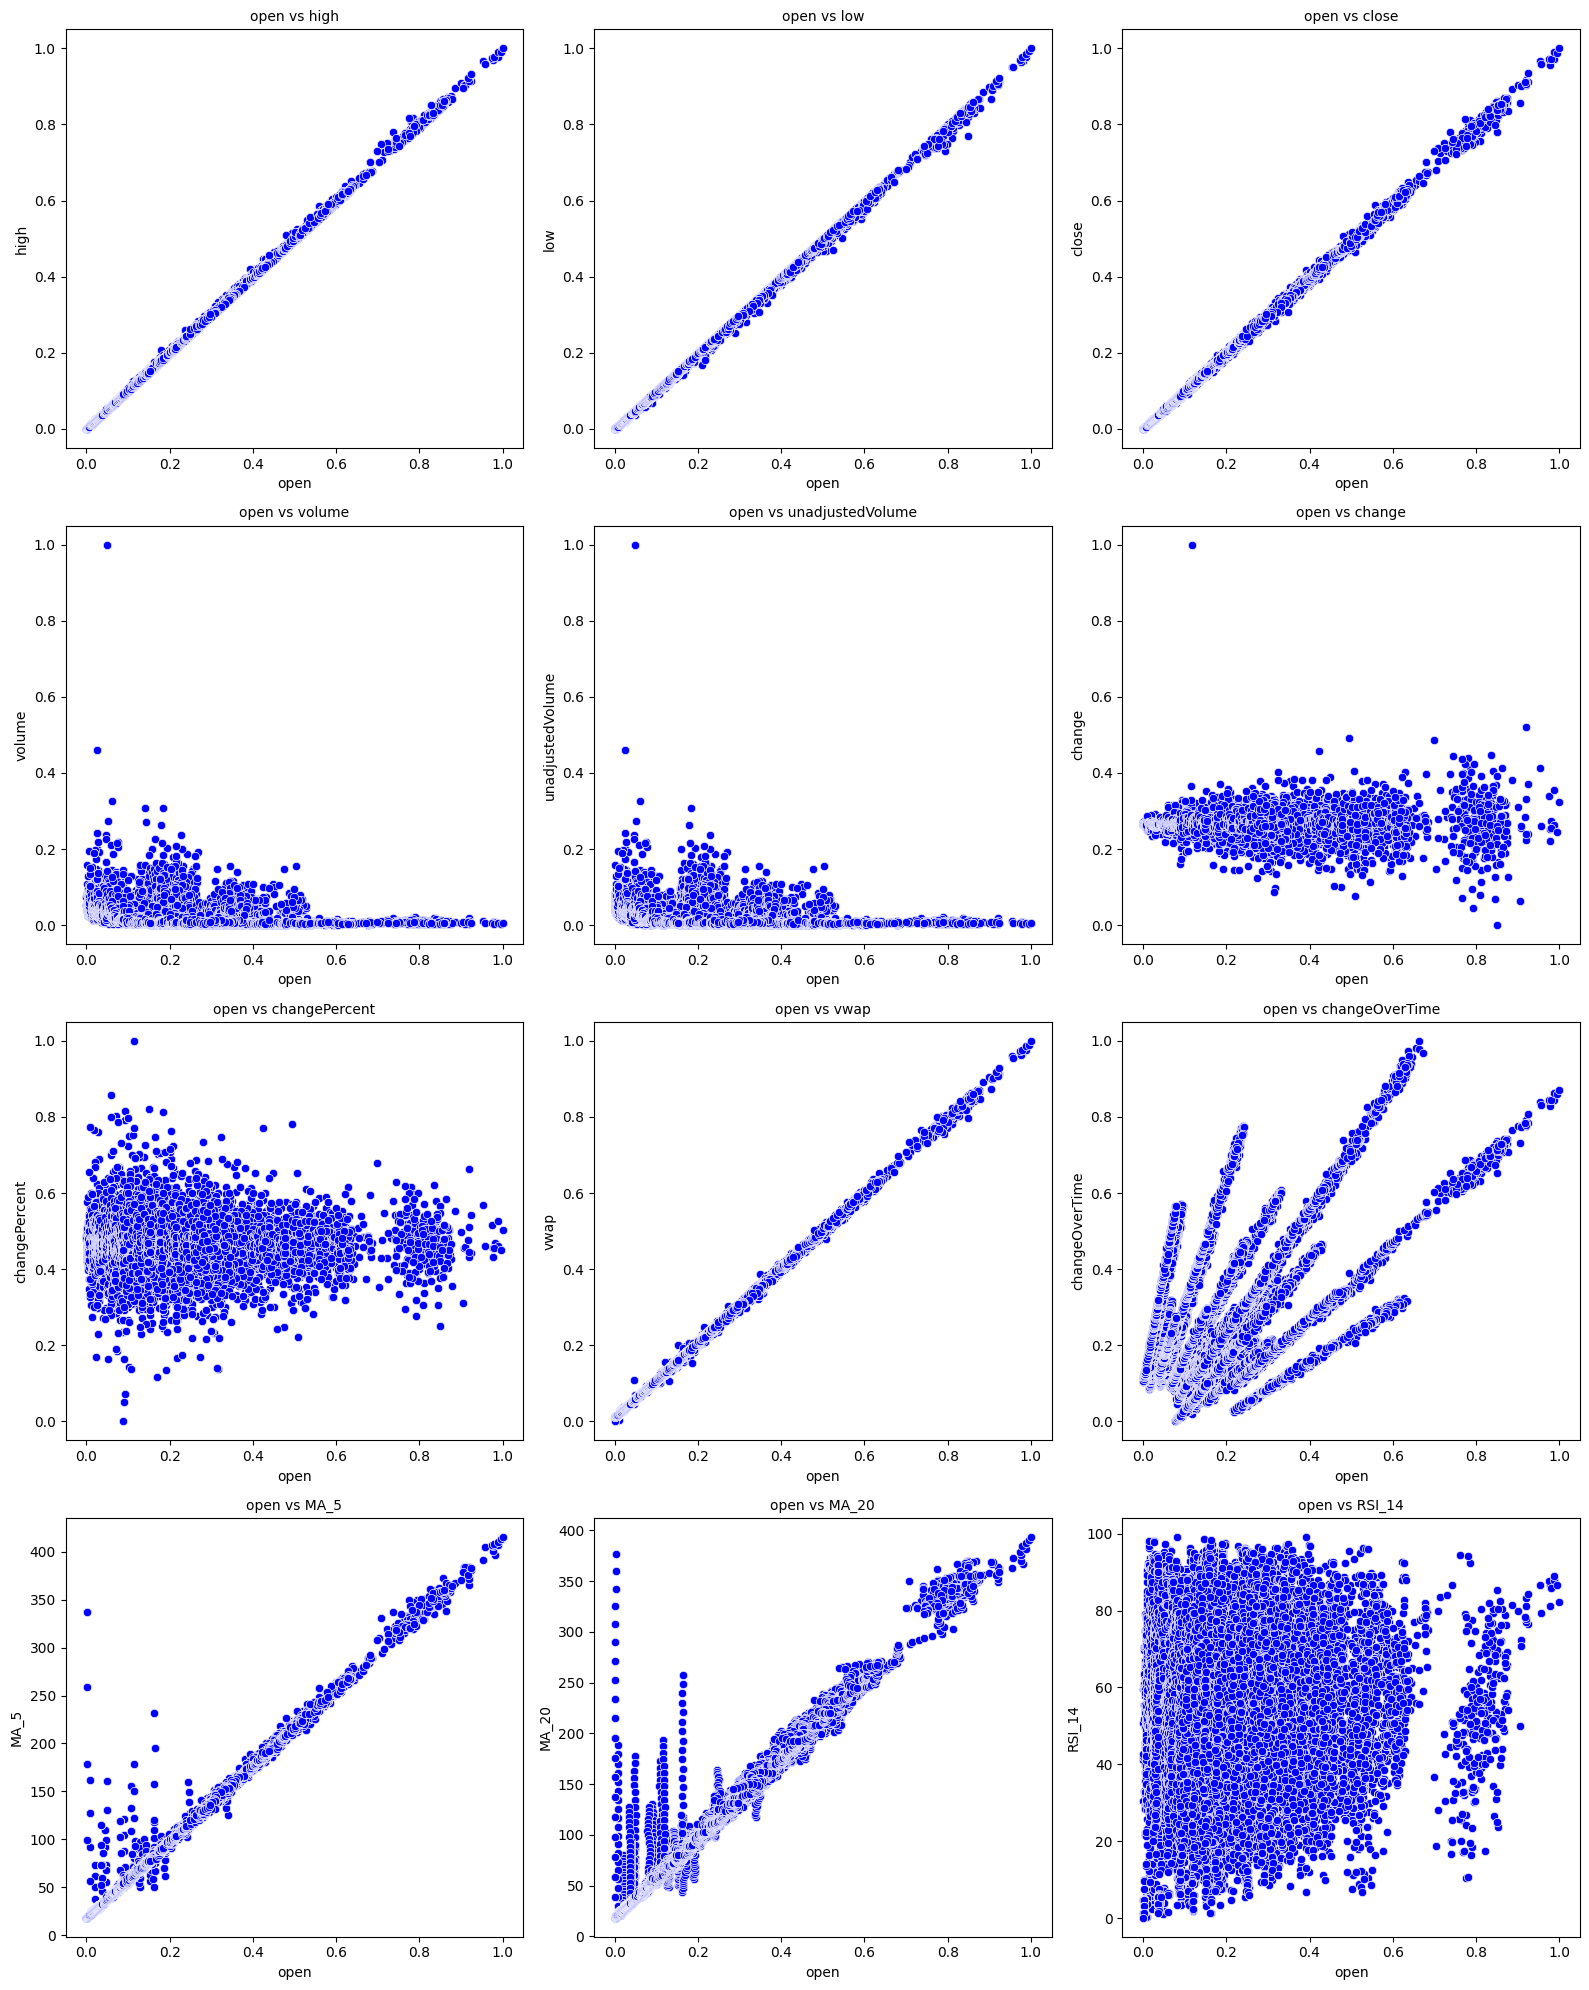

In [ ]:
import itertools

# Create a limited number of scatter plots for combinations of columns
plt.figure(figsize=(16, 20))

# Generate pairs of columns and limit to a reasonable number of scatter plots
column_pairs = list(itertools.combinations(numeric_cols.columns, 2))[:12]  # Limiting to 12 combinations for readability

# Plot scatter plots for each pair
for i, (col1, col2) in enumerate(column_pairs, 1):
    plt.subplot(4, 3, i)  # Create a 4x3 grid of plots
    sns.scatterplot(x=numeric_cols[col1], y=numeric_cols[col2], color='blue')
    plt.title(f'{col1} vs {col2}', fontsize=10)
    plt.xlabel(col1)
    plt.ylabel(col2)

plt.tight_layout()
plt.show()


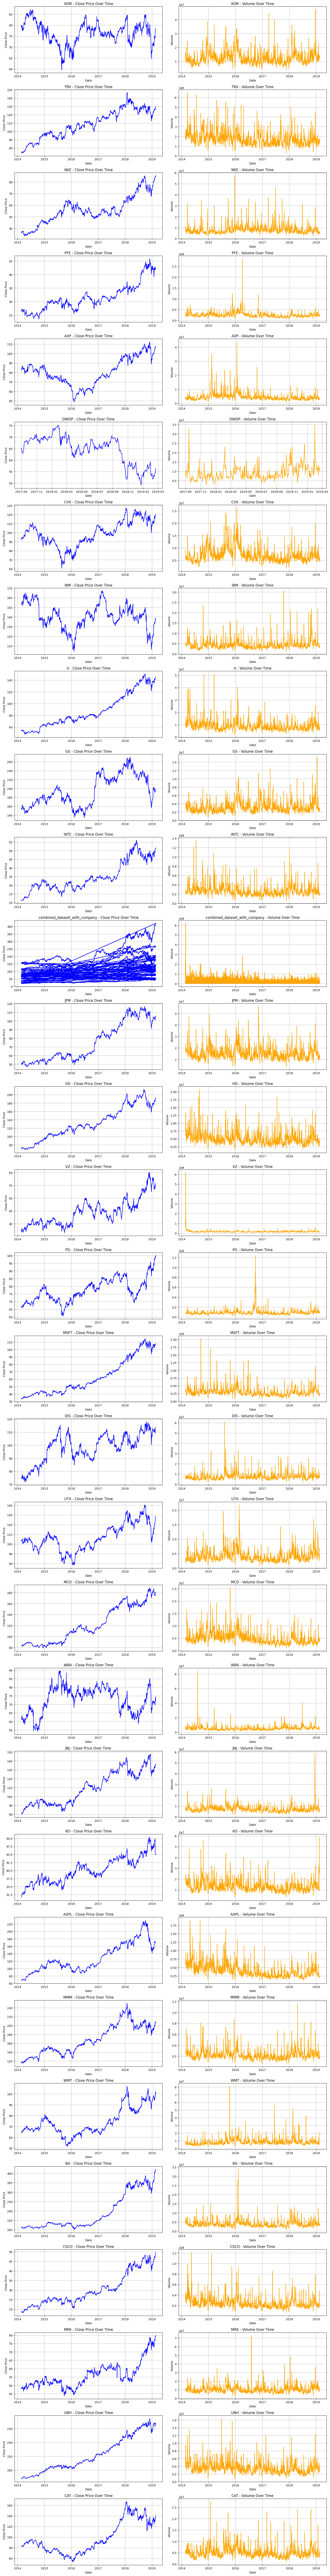

In [ ]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime if not already done
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Set up the figure for multiple time series plots
plt.figure(figsize=(16, len(combined_df['CompanyName'].unique()) * 4))

# List of unique companies to plot (from the 'CompanyName' column)
unique_companies = combined_df['CompanyName'].unique()

# Loop through each company and plot both close and volume
for i, company in enumerate(unique_companies, 1):  # Remove the limitation for the number of companies
    company_data = combined_df[combined_df['CompanyName'] == company]

    # Subplot for 'close' price
    plt.subplot(len(unique_companies), 2, i * 2 - 1)
    plt.plot(company_data['date'], company_data['close'], label=f'{company} Close Price', color='blue')
    plt.title(f'{company} - Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)

    # Subplot for 'volume'
    plt.subplot(len(unique_companies), 2, i * 2)
    plt.plot(company_data['date'], company_data['volume'], label=f'{company} Volume', color='orange')
    plt.title(f'{company} - Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Machine Learning Modelling

Linear Regression: (15.45226689857998, 3.930937152713075, 0.9354612668215556, 0.9944780602143536)
Random Forest: (0.881081948795435, 0.9386596554638081, 0.26880573477687353, 0.9996851412482453)
Gradient Boosting: (7.518550112923916, 2.7419974677092456, 0.99850006985205, 0.9973132109824775)
XGBoost: (14.526484357473763, 3.811362532936714, 1.0015713877544983, 0.9948088929316593)
Linear Regression CV MSE: 11.42148266628286
Random Forest CV MSE: 0.49453895456119545
Gradient Boosting CV MSE: 5.844186505974363
XGBoost CV MSE: 13.457281110388635


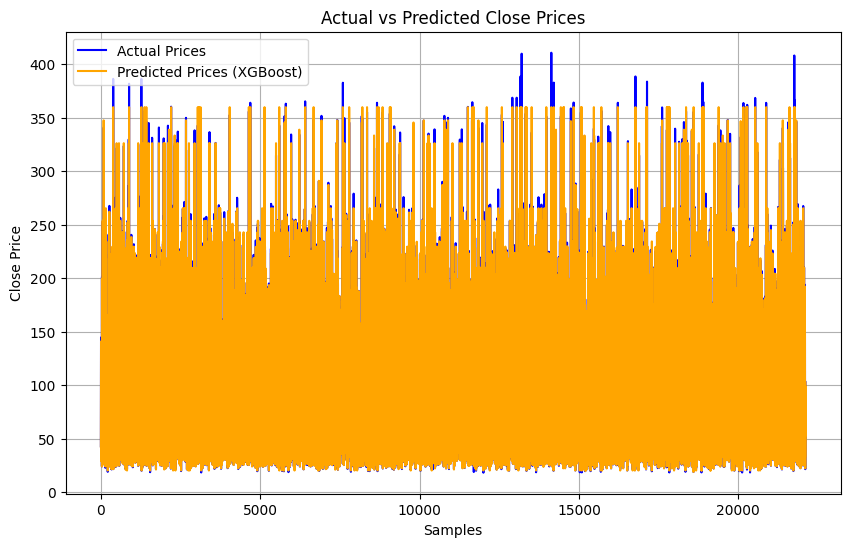

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the data
# For simplicity, let's predict 'close' price using lag features (e.g., previous day's 'close')

# Create lagged features (e.g., previous day’s close price)
combined_df['lag_1'] = combined_df['close'].shift(1)
combined_df['lag_2'] = combined_df['close'].shift(2)
combined_df['lag_3'] = combined_df['close'].shift(3)

# Drop rows with NaN values (created by shifting)
combined_df.dropna(inplace=True)

# Step 2: Split the data into training and testing sets
X = combined_df[['lag_1', 'lag_2', 'lag_3']]  # Feature columns (lagged values)
y = combined_df['close']  # Target column (close price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

# Step 4: Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 5: Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Step 6: XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Step 7: Model Evaluation (using MSE, RMSE, MAE, and R²)
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

metrics_lr = evaluate_model(y_test, y_pred_lr)
metrics_rf = evaluate_model(y_test, y_pred_rf)
metrics_gb = evaluate_model(y_test, y_pred_gb)
metrics_xgb = evaluate_model(y_test, y_pred_xgb)

# Print evaluation metrics
print("Linear Regression:", metrics_lr)
print("Random Forest:", metrics_rf)
print("Gradient Boosting:", metrics_gb)
print("XGBoost:", metrics_xgb)

# Step 8: Cross-Validation for robustness
cv_scores_lr = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Linear Regression CV MSE:", -cv_scores_lr.mean())
print("Random Forest CV MSE:", -cv_scores_rf.mean())
print("Gradient Boosting CV MSE:", -cv_scores_gb.mean())
print("XGBoost CV MSE:", -cv_scores_xgb.mean())

# Step 9: Visualization of Actual vs Predicted Prices for the XGBoost model
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred_xgb, label='Predicted Prices (XGBoost)', color='orange')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Samples')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Time Series Forecasting

### ARIMA Forecasting

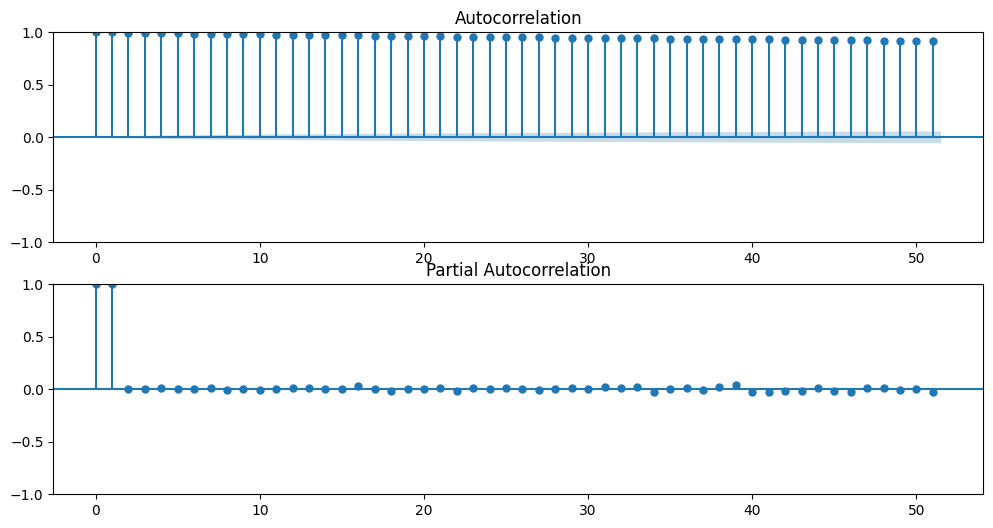

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

ARIMA RMSE: 12.737204911287915
ARIMA MAE: 11.275295109147766


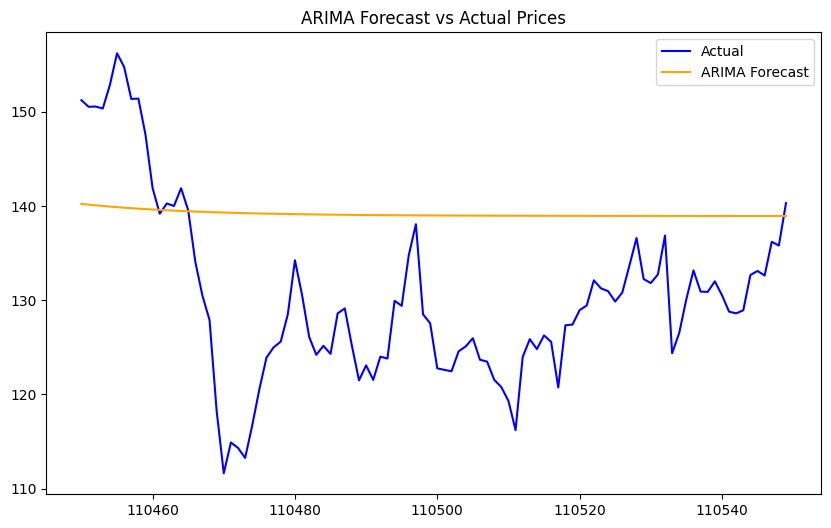

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Visualize ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(combined_df['close'], ax=plt.gca())
plt.subplot(212)
plot_pacf(combined_df['close'], ax=plt.gca())
plt.show()

# Step 2: Fit ARIMA model
# Let's assume initial parameters from ACF and PACF plots, and refine them with grid search
p, d, q = 2, 1, 2  # Initial guess based on visual inspection

arima_model = ARIMA(combined_df['close'], order=(p, d, q))
arima_result = arima_model.fit()

# Step 3: Forecast and evaluate
y_pred_arima = arima_result.forecast(steps=len(combined_df['close'][-100:]))
y_true = combined_df['close'][-100:]  # Actual values

# Evaluation
rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))
mae_arima = mean_absolute_error(y_true, y_pred_arima)

print(f"ARIMA RMSE: {rmse_arima}")
print(f"ARIMA MAE: {mae_arima}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_true.index, y_true, label='Actual', color='blue')
plt.plot(y_true.index, y_pred_arima, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual Prices')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA RMSE: 12.737204911287915
ARIMA MAE: 11.275295109147766


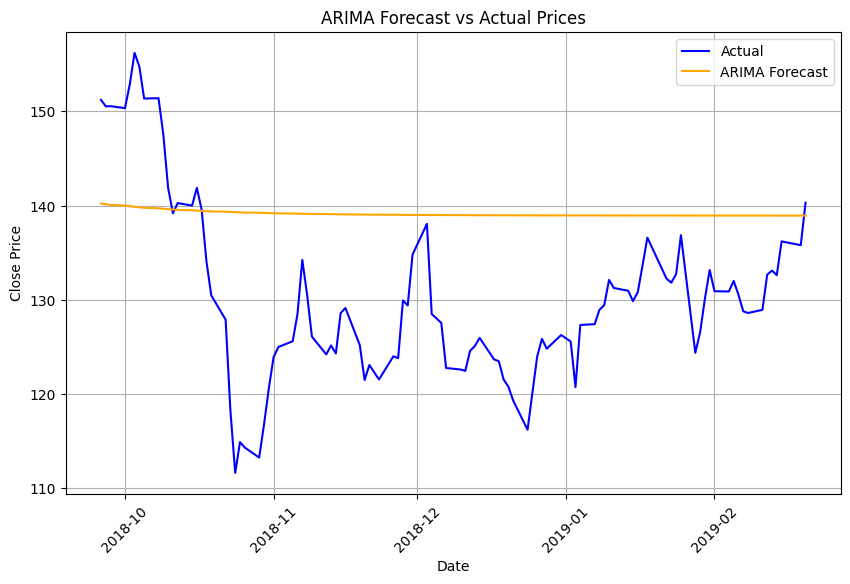

In [ ]:
# Forecast and evaluate
y_pred_arima = arima_result.forecast(steps=len(combined_df['close'][-100:]))
y_true = combined_df['close'][-100:]  # Actual values

# Convert the index (which contains the date) to be used in the plot
y_true_dates = combined_df['date'][-100:]  # Extract corresponding dates for the last 100 rows

# Evaluation
rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))
mae_arima = mean_absolute_error(y_true, y_pred_arima)

print(f"ARIMA RMSE: {rmse_arima}")
print(f"ARIMA MAE: {mae_arima}")

# Plot actual vs predicted with date on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(y_true_dates, y_true, label='Actual', color='blue')
plt.plot(y_true_dates, y_pred_arima, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

LSTM Implementation

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2763/2763 ━━━━━━━━━━━━━━━━━━━━ 160s 57ms/step - loss: 9.7084e-04
Epoch 2/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 200s 56ms/step - loss: 1.2090e-04
Epoch 3/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 200s 56ms/step - loss: 6.9931e-05
Epoch 4/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 155s 56ms/step - loss: 6.8837e-05
Epoch 5/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 202s 56ms/step - loss: 7.6063e-05
Epoch 6/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 157s 57ms/step - loss: 9.9067e-05
Epoch 7/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 202s 57ms/step - loss: 5.7613e-05
Epoch 8/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 157s 57ms/step - loss: 1.3750e-04
Epoch 9/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 202s 57ms/step - loss: 6.2743e-05
Epoch 10/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 199s 56ms/step - loss: 7.2825e-05
Epoch 11/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 157s 57ms/step - loss: 5.4948e-05
Epoch 12/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 204s 57ms/step - loss: 6.6386e-05
Epoch 13/20
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 205s 58ms/step - loss: 9.6090e-05
Epoch 14/20
2763/27

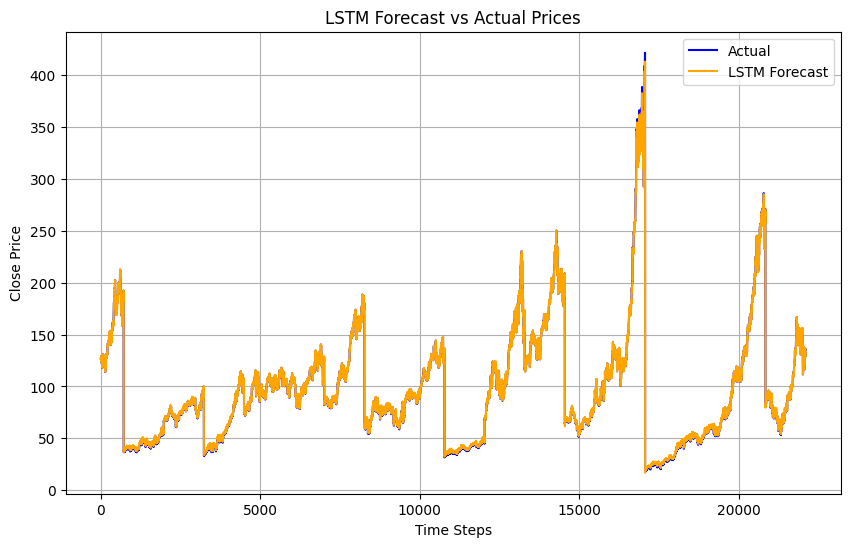

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(combined_df['close'].values.reshape(-1, 1))

# Create dataset in supervised learning format
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # We'll use 60 days to predict the next day's price
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 2: Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 3: Build the LSTM model
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(tf.keras.layers.LSTM(units=50))
lstm_model.add(tf.keras.layers.Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Step 4: Make predictions and evaluate the model
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)  # Inverse scale the predictions
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse scale the actual test data

# Evaluation
rmse_lstm = np.sqrt(mean_squared_error(y_test_scaled, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_scaled, y_pred_lstm)

print(f"LSTM RMSE: {rmse_lstm}")
print(f"LSTM MAE: {mae_lstm}")

# Step 5: Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, label='Actual', color='blue')
plt.plot(y_pred_lstm, label='LSTM Forecast', color='orange')
plt.title('LSTM Forecast vs Actual Prices')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

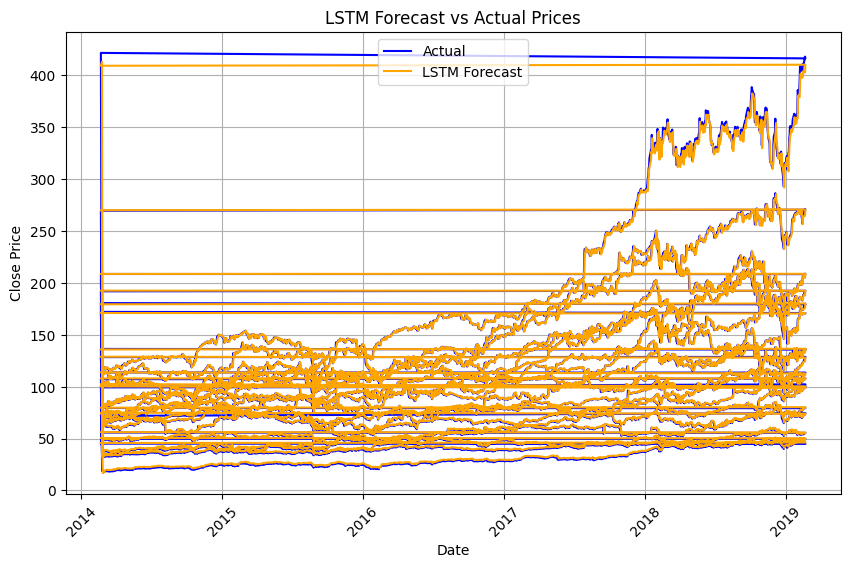

In [ ]:
# Assuming 'date' column is present in combined_df and contains the corresponding dates
# Prepare the test dataset dates for plotting
test_dates = combined_df['date'][-len(y_test):]

# Plot actual vs predicted values with dates on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test_scaled, label='Actual', color='blue')
plt.plot(test_dates, y_pred_lstm, label='LSTM Forecast', color='orange')
plt.title('LSTM Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.show()


In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx0cz03/xw1n__k8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx0cz03/93n_tztn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82888', 'data', 'file=/tmp/tmp7rx0cz03/xw1n__k8.json', 'init=/tmp/tmp7rx0cz03/93n_tztn.json', 'output', 'file=/tmp/tmp7rx0cz03/prophet_model7kzgdkxn/prophet_model-20240906001014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 23.925060873355854
Prophet MAE: 17.33240660626521


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


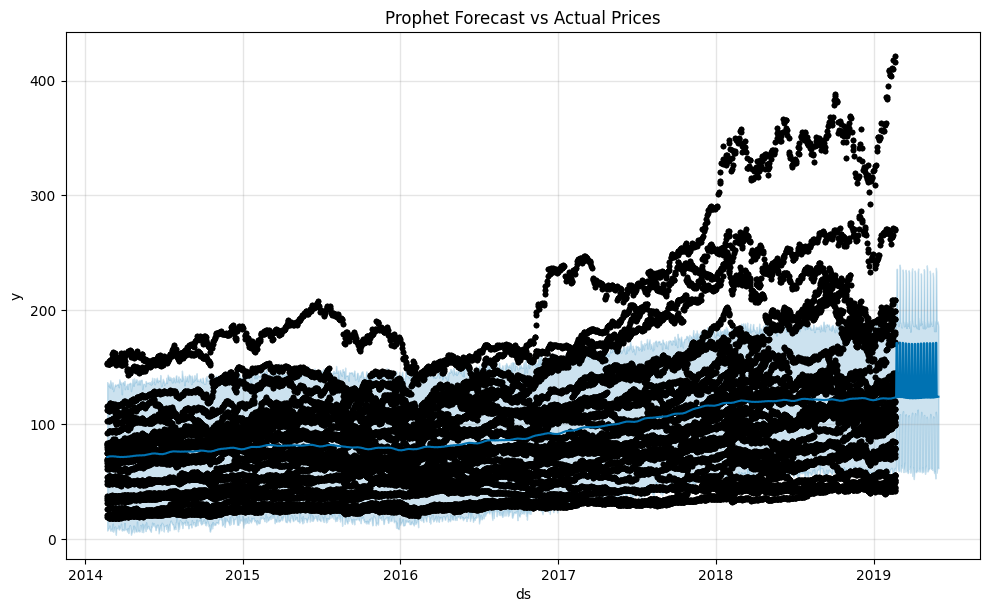

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Step 1: Prepare the data for Prophet
# Prophet requires columns 'ds' for date and 'y' for the target variable
prophet_df = combined_df[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# Step 2: Fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Step 3: Make future predictions
future = prophet_model.make_future_dataframe(periods=100)  # Predict the next 100 time steps
forecast = prophet_model.predict(future)

# Step 4: Evaluation
y_true = combined_df['close'][-100:].values  # Last 100 actual values for comparison
y_pred_prophet = forecast['yhat'][-100:].values  # Last 100 forecasted values

rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))
mae_prophet = mean_absolute_error(y_true, y_pred_prophet)

print(f"Prophet RMSE: {rmse_prophet}")
print(f"Prophet MAE: {mae_prophet}")

# Step 5: Plot the forecast vs actual
prophet_model.plot(forecast)
plt.title('Prophet Forecast vs Actual Prices')
plt.grid(True)
plt.show()

## Anomaly Detection

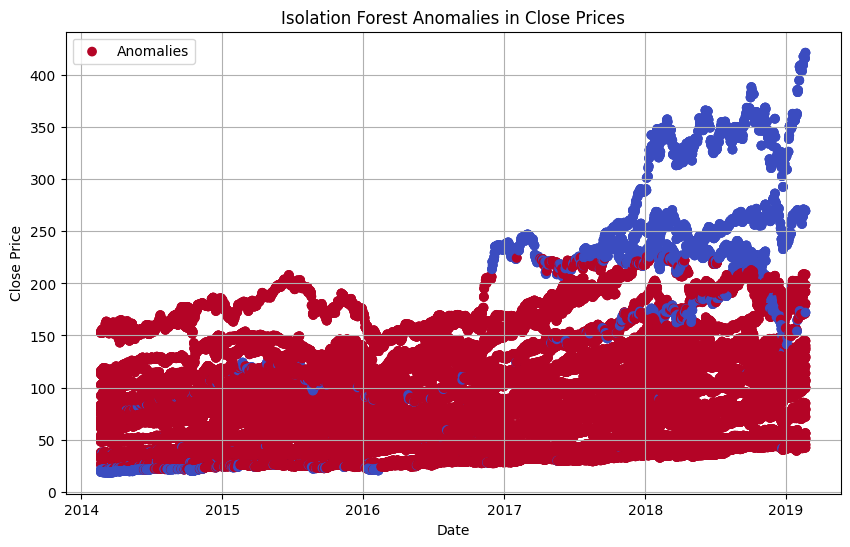

In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Prepare the data (select relevant columns for anomaly detection)
features = ['open', 'high', 'low', 'close', 'volume']
X = combined_df[features].values

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% of data is considered anomalous
y_pred_if = iso_forest.fit_predict(X)

# Add predictions to the DataFrame
combined_df['anomaly_if'] = y_pred_if

# Plot anomalies based on Isolation Forest
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['date'], combined_df['close'], c=combined_df['anomaly_if'], cmap='coolwarm', label='Anomalies')
plt.title('Isolation Forest Anomalies in Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

1.2 Local Outlier Factor (LOF)
LOF detects anomalies by measuring the local density deviation of a given data point with respect to its neighbors.

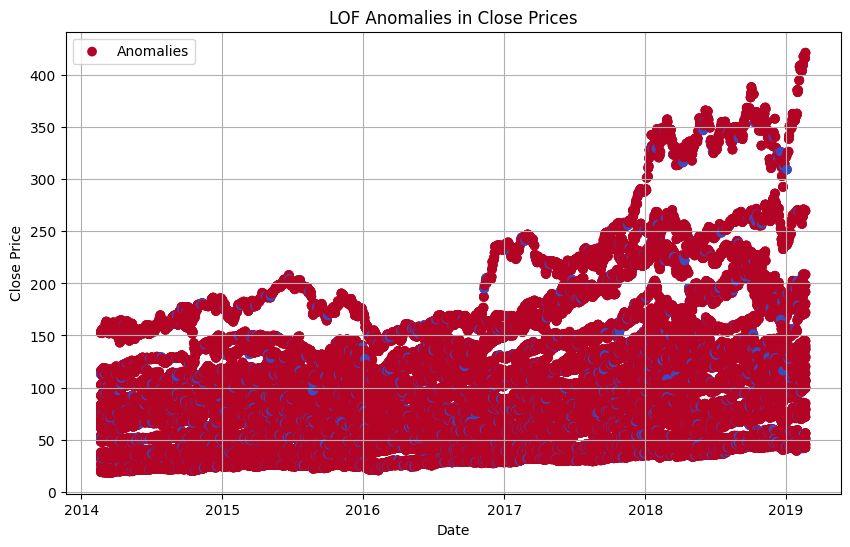

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Fit LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred_lof = lof.fit_predict(X)

# Add predictions to the DataFrame
combined_df['anomaly_lof'] = y_pred_lof

# Plot anomalies based on LOF
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['date'], combined_df['close'], c=combined_df['anomaly_lof'], cmap='coolwarm', label='Anomalies')
plt.title('LOF Anomalies in Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


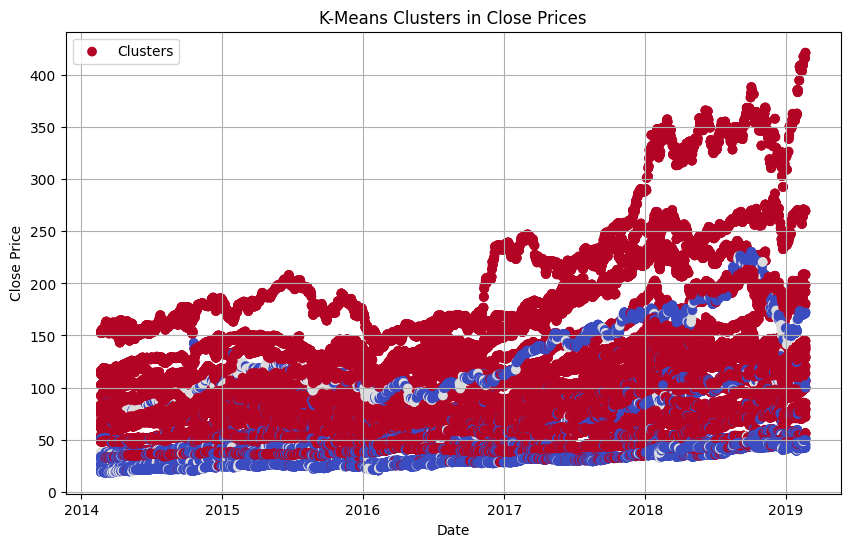

In [ ]:
from sklearn.cluster import KMeans

# Fit K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
combined_df['cluster_kmeans'] = clusters

# Plot K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['date'], combined_df['close'], c=combined_df['cluster_kmeans'], cmap='coolwarm', label='Clusters')
plt.title('K-Means Clusters in Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

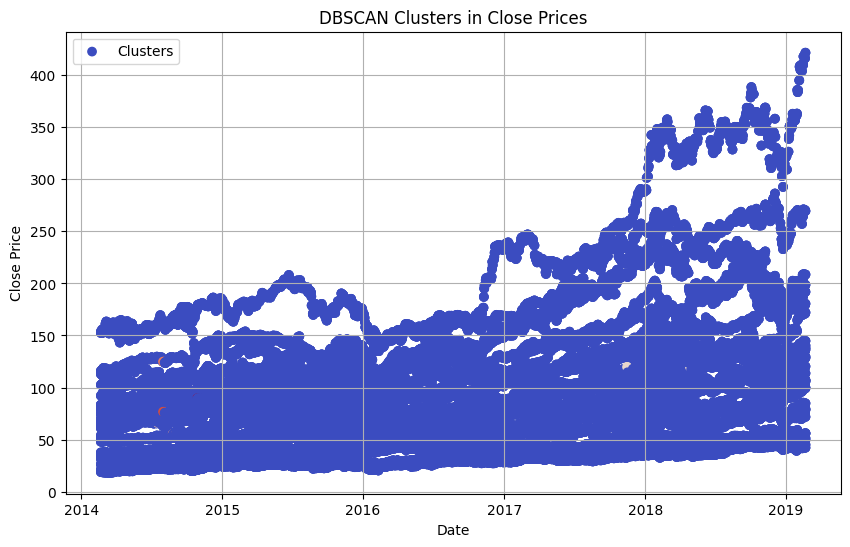

In [ ]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X)

# Add cluster labels to DataFrame
combined_df['cluster_dbscan'] = clusters_dbscan

# Plot DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['date'], combined_df['close'], c=combined_df['cluster_dbscan'], cmap='coolwarm', label='Clusters')
plt.title('DBSCAN Clusters in Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()